<a href="https://colab.research.google.com/github/Yin039/AI_Models/blob/main/Infectious_Disease_Classification_Using_Machine_Learning_And_Explainable_Artificial_Intelligence_(XAI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install kneed

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Data Preprocessing

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Research Proj/health_dataset.csv', encoding='latin-1')

In [ ]:
df1

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,Roseola,Runny nose,Rash,Red eyes,Loss of appetite,Rashes,Feverish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Roseola,High fever,Runny nose,Irritability,Headache,Cough,Rashes,Chills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Norovirus Infection,Stomach cramps,Nausea,Fatigue,Abdominal pain,Loss of appetite,Dehydration,Chills,Sweating,Rashes,General discomfort,Fever,NaN,NaN,NaN,NaN,NaN
3,Roseola,High fever,Runny nose,Irritability,Fatigue,Red eyes,Diarrhea,Vomiting,Feverish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Norovirus Infection,Diarrhea,Low-grade fever,Nausea,Headache,Fatigue,Loss of appetite,Dehydration,Chills,Sweating,General discomfort,Irritability,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12086,Roseola,Runny nose,Diarrhea,Rashes,Chills,Feverish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12087,Roseola,Rash,Irritability,Fatigue,Swollen lymph nodes,Headache,Cough,Red eyes,Body aches,Rashes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12088,Roseola,Runny nose,Rash,Swollen lymph nodes,Cough,Vomiting,Loss of appetite,Rashes,Feverish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12089,"Hand, Foot, and Mouth Disease",Fever,Sores in mouth,Loss of appetite,Irritability,Sore throat,Mouth sores,Red spots,Headache,General discomfort,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12091 entries, 0 to 12090
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     12091 non-null  object
 1   Symptom_1   12091 non-null  object
 2   Symptom_2   12091 non-null  object
 3   Symptom_3   12091 non-null  object
 4   Symptom_4   12091 non-null  object
 5   Symptom_5   11866 non-null  object
 6   Symptom_6   11357 non-null  object
 7   Symptom_7   10354 non-null  object
 8   Symptom_8   8736 non-null   object
 9   Symptom_9   6699 non-null   object
 10  Symptom_10  4550 non-null   object
 11  Symptom_11  2639 non-null   object
 12  Symptom_12  1312 non-null   object
 13  Symptom_13  520 non-null    object
 14  Symptom_14  169 non-null    object
 15  Symptom_15  42 non-null     object
 16  Symptom_16  5 non-null      object
dtypes: object(17)
memory usage: 1.6+ MB


In [ ]:
df1['Symptom_1'].value_counts()

,count
Symptom_1,
Fever,2259
Diarrhea,2172
High fever,1710
Vomiting,990
Abdominal pain or cramps,882
...,...
Sensation of a foreign object in the eye,1
Redness,1
Swollen joints,1


## Encoding

In [ ]:
# Combine symptom columns into list per row
symptom_columns = [f'Symptom_{i}' for i in range(1, 17)]
df1['combined_symptoms'] = df1[symptom_columns].values.tolist()

# Remove NaN values
df1['combined_symptoms'] = df1['combined_symptoms'].apply(lambda x: [s for s in x if pd.notnull(s)])

# Initialize and apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(df1['combined_symptoms'])

# Labels (e.g., 'Disease')
y = df1['Disease']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.astype(str))

In [ ]:
# Convert to DataFrame for better readability
X_df = pd.DataFrame(X, columns=mlb.classes_)
X_df.head()

,Abdominal pain,Abdominal pain or cramps,Achy muscles and bones,Bad taste in the mouth,Blisters,Bloody stools,Blurred vision (intermittent),Body aches,Burning sensation in the eyes,Chills,...,Trouble chewing,Trouble sleeping,Visible lice on the scalp,Vomiting,Vomiting after coughing,Watering eyes,Watery discharge from nose that thickens and turns yellow or green,White patches on tonsils,Whooping cough,Yellow crust
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(label_encoder.classes_)

['Common Cold' 'Conjunctivitis (Pink Eye)'
 'Fifth Disease (Erythema Infectiosum)' 'Hand, Foot, and Mouth Disease'
 'Head Lice Infestation' 'Impetigo' 'Measles' 'Mumps'
 'Norovirus Infection' 'Pertussis (Whooping Cough)' 'Roseola' 'Rubella'
 'Scarlet Fever' 'Shigellosis (Bacillary Dysentery)' 'Strep Throat'
 'Thrush (Oral Candidiasis)']


## Train-test split

In [ ]:
# Split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

## Exploratory Data Analysis (EDA)

In [ ]:
from sklearn.feature_selection import chi2, mutual_info_classif
from scipy.stats import fisher_exact

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train, columns=mlb.classes_)
X_test_df = pd.DataFrame(X_test, columns=mlb.classes_)

### Chi-Square Test

In [ ]:
chi2_vals, p_vals = chi2(X_train, y_train)
chi2_df = pd.DataFrame({
    "symptom": X_train_df.columns,
    "chi2": chi2_vals,
    "p_value": p_vals
}).sort_values("chi2", ascending=False)

print("\nTop symptoms by Chi-square test:")
print(chi2_df.head(10))


Top symptoms by Chi-square test:
                                               symptom         chi2  p_value
21                  Dry, cracked skin at mouth corners  9669.000000      0.0
87                    Soreness or burning in the mouth  9669.000000      0.0
73   Redness, irritation, and pain under dentures (...  9669.000000      0.0
71                                             Redness  7729.600000      0.0
96                       Swollen eyelids (blepharitis)  7729.600000      0.0
8                        Burning sensation in the eyes  7729.600000      0.0
105                                          Tiredness  7396.645793      0.0
29                  Generally feeling unwell (malaise)  7026.181818      0.0
103                                   Tickling feeling  7018.181818      0.0
107                                   Trouble sleeping  7018.181818      0.0


In [ ]:
print(chi2_df.tail(10))

                                symptom         chi2        p_value
25                                Fever  1511.571031   0.000000e+00
9                                Chills   642.899660  2.685710e-127
64                               Rashes   641.811237  4.577612e-127
7                            Body aches   639.501924  1.418916e-126
109                            Vomiting   625.734749  1.202881e-123
15                             Diarrhea   615.443913  1.854345e-121
24                              Fatigue   231.267322   8.785109e-41
42                     Loss of appetite   197.634469   6.422827e-34
31                             Headache   162.263676   8.675129e-27
11   Cotton-like sensation in the mouth          NaN            NaN


In [ ]:
print(X_train_df["Cotton-like sensation in the mouth"].value_counts(dropna=False))

Cotton-like sensation in the mouth
0    9672
Name: count, dtype: int64


### Unified Feature Ranking

In [ ]:
# Normalize scores 0–1
chi2_df["chi2_norm"] = chi2_df["chi2"] / chi2_df["chi2"].max()

# Calculate the occurrence of symptom for each disease
frequency_df = pd.DataFrame({
    "symptom": X_train_df.columns,
    "frequency": X_train_df.sum().values / len(X_train_df)
})

# Merge normalized Chi-square and frequency
ranking = chi2_df[["symptom","chi2_norm"]].merge(
    frequency_df[["symptom","frequency"]], on="symptom"
)

# Weighted score
ranking["score"] = (0.4*ranking["chi2_norm"] + 0.6*ranking["frequency"])

ranking = ranking.sort_values("score", ascending=False)
ranking = ranking.round(4)

print("\nFinal Symptom Ranking:")
print(ranking.head(10))


Final Symptom Ranking:
                                               symptom  chi2_norm  frequency  \
0                   Dry, cracked skin at mouth corners     1.0000     0.0003   
1                     Soreness or burning in the mouth     1.0000     0.0003   
2    Redness, irritation, and pain under dentures (...     1.0000     0.0003   
3                                              Redness     0.7994     0.0008   
4                        Swollen eyelids (blepharitis)     0.7994     0.0008   
5                        Burning sensation in the eyes     0.7994     0.0008   
6                                            Tiredness     0.7650     0.0151   
114                                           Headache     0.0168     0.4966   
113                                   Loss of appetite     0.0204     0.4804   
112                                            Fatigue     0.0239     0.4761   

      score  
0    0.4002  
1    0.4002  
2    0.4002  
3    0.3203  
4    0.3203  
5    0.3203

## Feature Engineering

### Feature Selection

In [ ]:
# Select top 35 symptoms
top_k = 35
selected_symptoms = ranking.head(top_k)["symptom"].tolist()

# Apply same selection to both train and test
X_train_selected = X_train_df[selected_symptoms].copy()
X_test_selected  = X_test_df[selected_symptoms].copy()

print("New shape after feature selection:", X_train_selected.shape)

New shape after feature selection: (9672, 35)


#### Symptom Correlation Heatmap

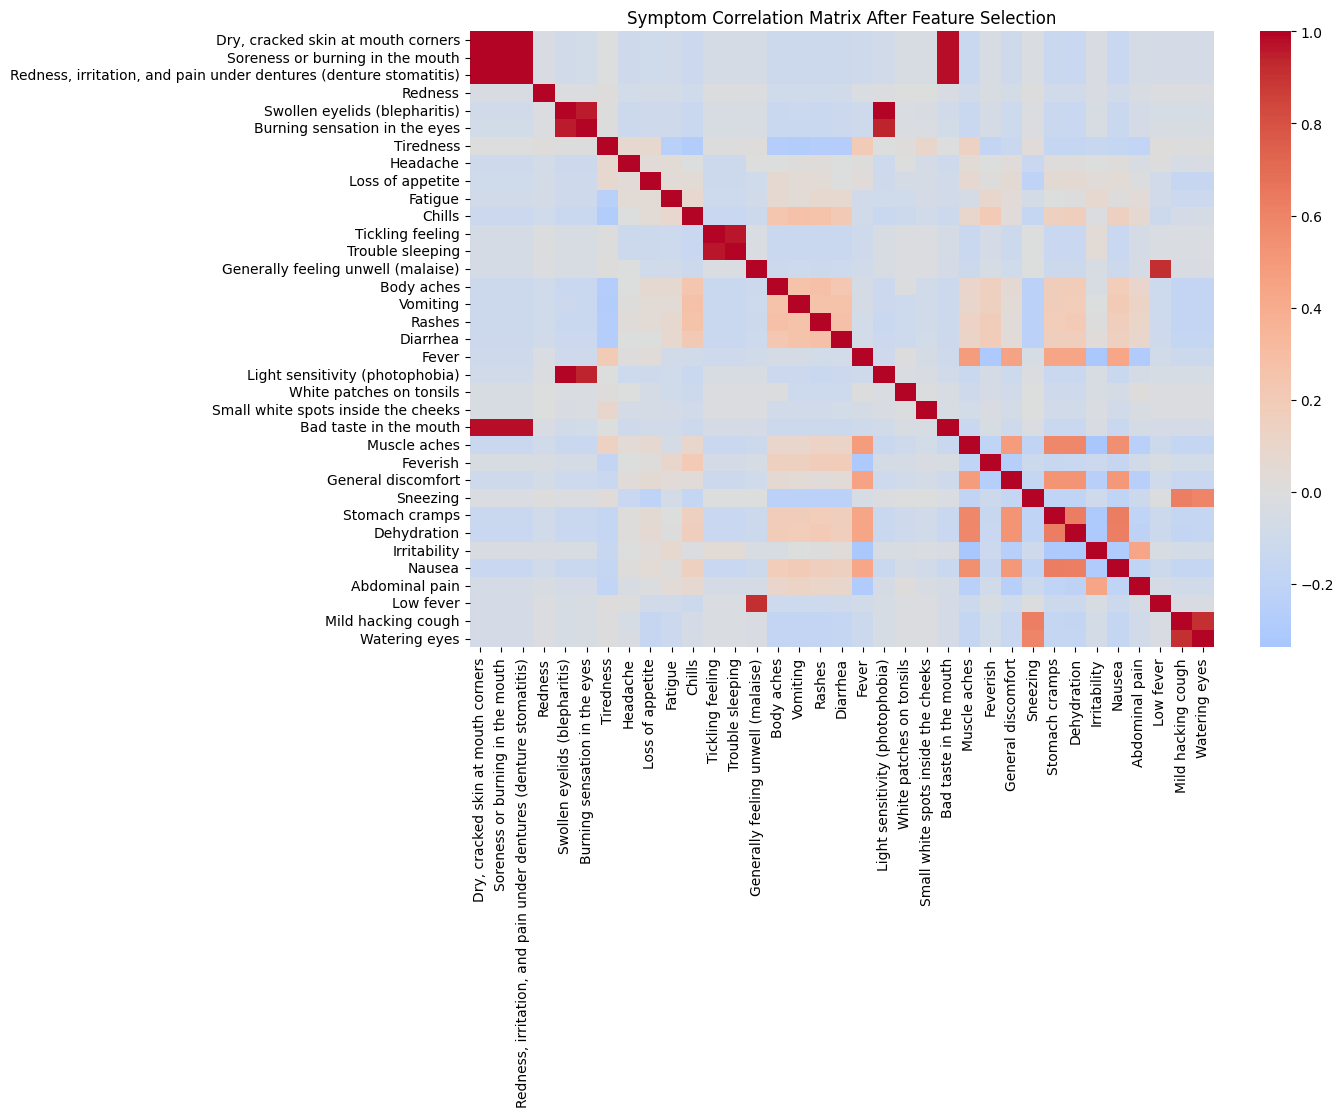

In [ ]:
sym_corr = X_train_selected.corr()

plt.figure(figsize=(12,8))
sns.heatmap(sym_corr.corr(), cmap="coolwarm", center=0)
plt.title("Symptom Correlation Matrix After Feature Selection")
plt.show()

Dropped symptoms due to high correlation (>0.9):
['Dry, cracked skin at mouth corners', 'Soreness or burning in the mouth', 'Light sensitivity (photophobia)']

Train shape before: (9672, 35)  → after: (9672, 32)
Test  shape before: (2419, 35)  → after: (2419, 32)


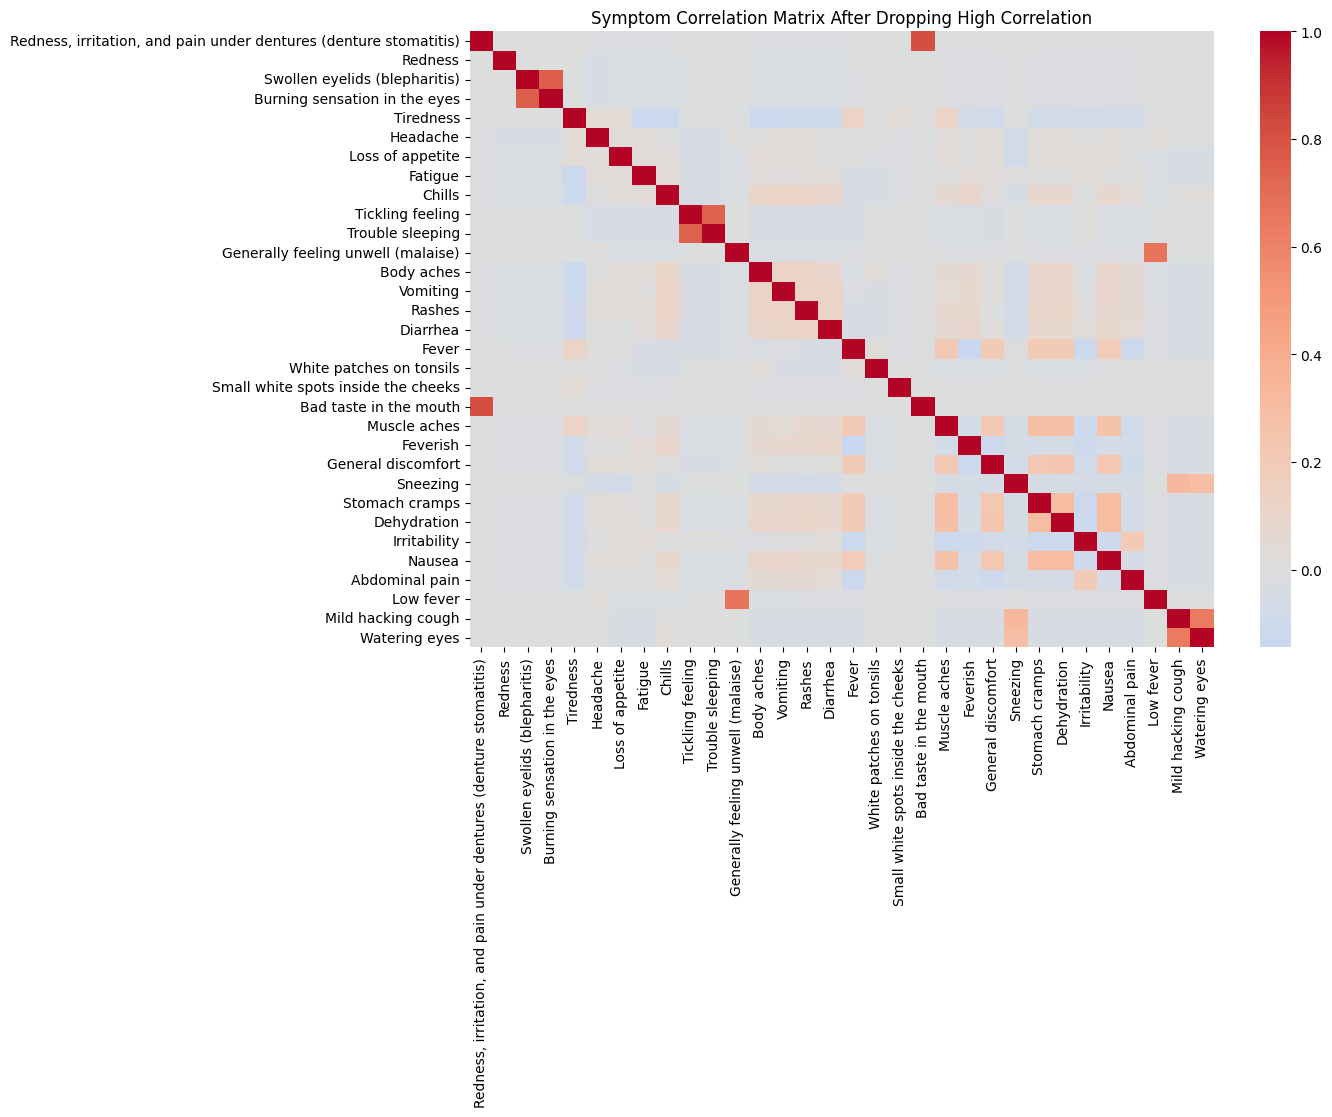

In [ ]:
corr_matrix = sym_corr.abs()

# Keep only upper triangle to avoid duplicates
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Get features to drop when correlation > 0.9
to_drop = []
for col in upper.columns:
    correlated_features = upper.index[upper[col] > 0.9].tolist()
    for corr_feat in correlated_features:
        # Compare chi-square scores to drop the feature with lower score
        chi2_col = chi2_df.loc[chi2_df["symptom"] == col, "chi2"].values[0]
        chi2_corr = chi2_df.loc[chi2_df["symptom"] == corr_feat, "chi2"].values[0]

        if chi2_col < chi2_corr:
            if col not in to_drop:
                to_drop.append(col)
        else:
            if corr_feat not in to_drop:
                to_drop.append(corr_feat)

# Drop correlated features > 0.9
X_train_reduced = X_train_selected.drop(columns=to_drop, errors="ignore")
X_test_reduced  = X_test_selected.drop(columns=to_drop, errors="ignore")

# Save list of dropped symptoms for documentation
dropped_symptoms = to_drop

print("Dropped symptoms due to high correlation (>0.9):")
print(dropped_symptoms)
print("\nTrain shape before:", X_train_selected.shape, " → after:", X_train_reduced.shape)
print("Test  shape before:", X_test_selected.shape,  " → after:", X_test_reduced.shape)

plt.figure(figsize=(12,8))
sns.heatmap(X_train_reduced.corr(), cmap="coolwarm", center=0)
plt.title("Symptom Correlation Matrix After Dropping High Correlation")
plt.show()

In [ ]:
# To check the number of selected symptoms appear in each disease
# Ensure all diseases contain more than one symptom
print("Coverage of symptoms in each disease")
for disease in np.unique(y_train):
    mask = (y_train == disease)
    sub_X = X_train_reduced[mask]
    disease_name = label_encoder.inverse_transform([disease])[0]
    print(f"disease {disease} - {disease_name}: {(sub_X.sum(axis=0) > 0).sum()}")

Coverage of symptoms in each disease
disease 0 - Common Cold: 5
disease 1 - Conjunctivitis (Pink Eye): 2
disease 2 - Fifth Disease (Erythema Infectiosum): 5
disease 3 - Hand, Foot, and Mouth Disease: 6
disease 4 - Head Lice Infestation: 3
disease 5 - Impetigo: 2
disease 6 - Measles: 2
disease 7 - Mumps: 5
disease 8 - Norovirus Infection: 16
disease 9 - Pertussis (Whooping Cough): 3
disease 10 - Roseola: 11
disease 11 - Rubella: 3
disease 12 - Scarlet Fever: 2
disease 13 - Shigellosis (Bacillary Dysentery): 15
disease 14 - Strep Throat: 7
disease 15 - Thrush (Oral Candidiasis): 2


### Truncated Singular Value Decomposition (SVD)

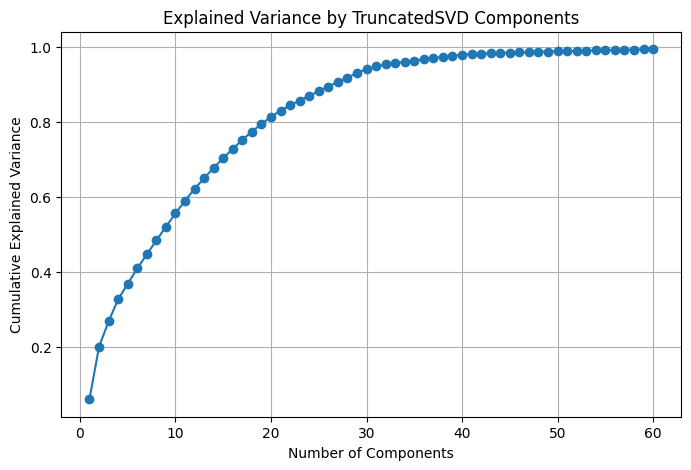

Optimal components to keep 95% variance: 32


In [ ]:
from sklearn.decomposition import TruncatedSVD

# Keep top 60 latent features
svd = TruncatedSVD(n_components=60, random_state=42)

# Fit on train set
svd.fit(X_train)

# Calculate the cumulative explained variance to decide number of components
explained_var = svd.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by TruncatedSVD Components")
plt.grid(True)
plt.show()

n_components_opt = np.argmax(cum_var >= 0.95) + 1
print("Optimal components to keep 95% variance:", n_components_opt)

In [ ]:
# Optimal number of components are kept
svd = TruncatedSVD(n_components=n_components_opt, random_state=42)

# Fit on train set
X_train_svd = svd.fit_transform(X_train)
# Transform test using same truncated SVD
X_test_svd = svd.transform(X_test)

print("Original shape:", X_train.shape)
print("Reduced shape:", X_train_svd.shape)

Original shape: (9672, 116)
Reduced shape: (9672, 32)


## Oversampling training set

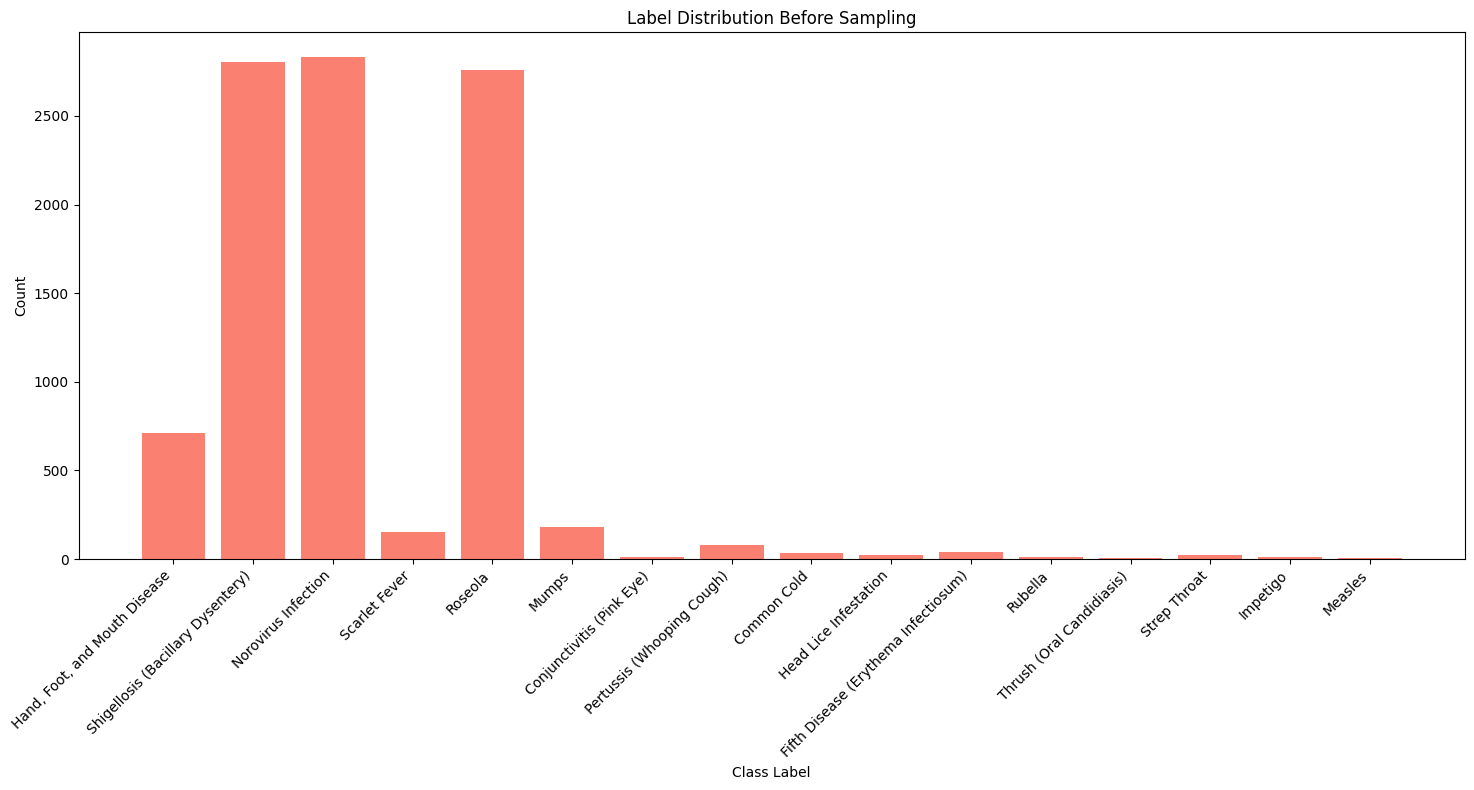

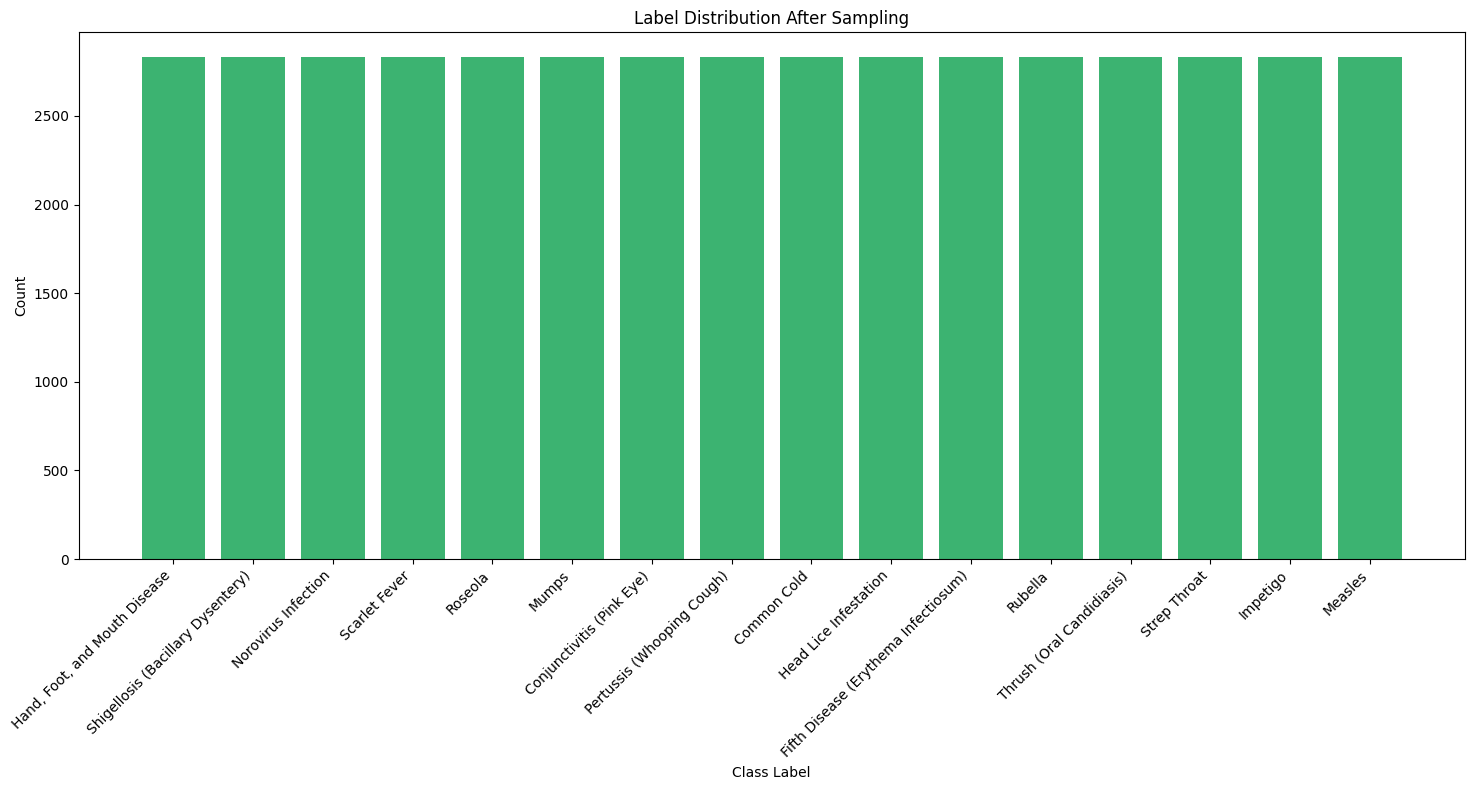

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import numpy as np

# Get class names from the label encoder
class_names = label_encoder.classes_

# Count before sampling
counter_before = Counter(y_train)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled_selected, y_resampled_selected = smote.fit_resample(X_train_reduced, y_train)
X_resampled_svd, y_resampled_svd = smote.fit_resample(X_train_svd, y_train)

# Count after sampling
counter_after = Counter(y_resampled)

# Convert integer keys to class name labels
labels_before = [class_names[k] for k in counter_before.keys()]
labels_after = [class_names[k] for k in counter_after.keys()]
counts_before = [counter_before[k] for k in counter_before.keys()]
counts_after = [counter_after[k] for k in counter_after.keys()]

# BEFORE SAMPLING
x_pos_before = np.arange(len(labels_before))
plt.figure(figsize=(15, 8))
plt.bar(x_pos_before, counts_before, color='salmon')
plt.title("Label Distribution Before Sampling")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(x_pos_before, labels_before, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# AFTER SAMPLING
x_pos_after = np.arange(len(labels_after))
plt.figure(figsize=(15, 8))
plt.bar(x_pos_after, counts_after, color='mediumseagreen')
plt.title("Label Distribution After Sampling")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(x_pos_after, labels_after, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Machine Learning Models

## Logistic Regression and Tree-based Models

In [ ]:
# Define models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(class_weight='balanced')
}

# Dictionary to store results
models_auc = {}
models_y_pred = {}
models_auc_selected = {}
models_y_pred_selected = {}
models_auc_svd = {}
models_y_pred_svd = {}

In [ ]:
# Loop through models
for name, model in models.items():
    #----------------Baseline---------------#
    # Train
    model.fit(X_resampled, y_resampled)

    # Predict classes
    y_pred = model.predict(X_test)
    models_y_pred[name] = y_pred  # save predictions

    # Predict probabilities for ROC-AUC
    y_proba = model.predict_proba(X_test)

    # AUC-ROC (macro)
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    models_auc[name] = auc

    #---------------Feature Selection---------------#
    # Train
    model.fit(X_resampled_selected, y_resampled_selected)

    # Predict classes
    y_pred = model.predict(X_test_reduced)
    models_y_pred_selected[name] = y_pred  # save predictions

    # Predict probabilities for ROC-AUC
    y_proba = model.predict_proba(X_test_reduced)

    # AUC-ROC (macro)
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    models_auc_selected[name] = auc

    #---------------Truncated SVD---------------#
    # Train
    model.fit(X_resampled_svd, y_resampled_svd)

    # Predict classes
    y_pred = model.predict(X_test_svd)
    models_y_pred_svd[name] = y_pred  # save predictions

    # Predict probabilities for ROC-AUC
    y_proba = model.predict_proba(X_test_svd)

    # AUC-ROC (macro)
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    models_auc_svd[name] = auc

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:36:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "

## Neural Networks - MLP


### MLP - Baseline

In [ ]:
num_classes=16
y_train_cat = to_categorical(y_resampled, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Buil MLP model
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.5),                  # Dropout layer
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile model
mlp.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = mlp.fit(X_resampled, y_train_cat,
                        validation_data=(X_test, y_test_cat),
                        epochs=10,
                        batch_size=16,
                        verbose=1)

# Predict probabilities for ROC-AUC
y_proba_mlp = mlp.predict(X_test)
y_pred_mlp = np.argmax(y_proba_mlp, axis=1)

models_y_pred["MLP"] = y_pred_mlp  # save predictions

# Compute AUC-ROC score (macro-averaged)
auc_mlp = roc_auc_score(y_test_cat, y_proba_mlp, multi_class='ovr', average='macro')
models_auc["MLP"] = auc_mlp

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7960 - loss: 0.7504 - val_accuracy: 0.9797 - val_loss: 0.0375
Epoch 2/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9772 - loss: 0.0637 - val_accuracy: 0.9797 - val_loss: 0.0395
Epoch 3/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9808 - loss: 0.0478 - val_accuracy: 0.9802 - val_loss: 0.0377
Epoch 4/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9839 - loss: 0.0407 - val_accuracy: 0.9781 - val_loss: 0.0381
Epoch 5/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9847 - loss: 0.0352 - val_accuracy: 0.9785 - val_loss: 0.0399
Epoch 6/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9857 - loss: 0.0327 - val_accuracy: 0.9777 - val_loss: 0.0430
Epoch 7/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9865 - loss: 0.0304 - val_accuracy: 0.9773 - val_loss: 0.0446
Epoch 8/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9875 - loss: 0.027

### MLP - Feature Selection

In [ ]:
y_train_cat_selected = to_categorical(y_resampled_selected, num_classes=num_classes)

# Buil MLP model
mlp_selected = Sequential([
    Dense(64, activation='relu', input_shape=(X_resampled_selected.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.5),                  # Dropout layer
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile model
mlp_selected.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = mlp_selected.fit(X_resampled_selected, y_train_cat_selected,
                        validation_data=(X_test_reduced, y_test_cat),
                        epochs=10,
                        batch_size=16,
                        verbose=1)

# Predict probabilities for ROC-AUC
y_proba_mlp = mlp_selected.predict(X_test_reduced)
y_pred_mlp = np.argmax(y_proba_mlp, axis=1)

models_y_pred_selected["MLP"] = y_pred_mlp  # save predictions

# Compute AUC-ROC score (macro-averaged)
auc_mlp = roc_auc_score(y_test_cat, y_proba_mlp, multi_class='ovr', average='macro')
models_auc_selected["MLP"] = auc_mlp

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2830/2830 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6693 - loss: 1.1128 - val_accuracy: 0.8942 - val_loss: 0.2754
Epoch 2/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8739 - loss: 0.3372 - val_accuracy: 0.8967 - val_loss: 0.2572
Epoch 3/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8820 - loss: 0.2979 - val_accuracy: 0.9078 - val_loss: 0.2427
Epoch 4/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8910 - loss: 0.2743 - val_accuracy: 0.9103 - val_loss: 0.2547
Epoch 5/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8912 - loss: 0.2666 - val_accuracy: 0.9115 - val_loss: 0.2544
Epoch 6/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8964 - loss: 0.2588 - val_accuracy: 0.9124 - val_loss: 0.2649
Epoch 7/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8975 - loss: 0.2577 - val_accuracy: 0.9128 - val_loss: 0.2597
Epoch 8/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8967 - loss: 0.2479 - val_accur

### MLP - Truncated SVD

In [ ]:
y_train_cat_svd = to_categorical(y_resampled_svd, num_classes=num_classes)

# Buil MLP model
mlp_svd = Sequential([
    Dense(64, activation='relu', input_shape=(X_resampled_svd.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.5),                  # Dropout layer
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile model
mlp_svd.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_svd = mlp_svd.fit(X_resampled_svd, y_train_cat_svd,
                        validation_data=(X_test_svd, y_test_cat),
                        epochs=10,
                        batch_size=16,
                        verbose=1)

# Predict probabilities for ROC-AUC
y_proba_mlp = mlp_svd.predict(X_test_svd)
y_pred_mlp = np.argmax(y_proba_mlp, axis=1)

models_y_pred_svd["MLP"] = y_pred_mlp  # save predictions

# Compute AUC-ROC score (macro-averaged)
auc_mlp = roc_auc_score(y_test_cat, y_proba_mlp, multi_class='ovr', average='macro')
models_auc_svd["MLP"] = auc_mlp

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2830/2830 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6669 - loss: 1.0889 - val_accuracy: 0.9748 - val_loss: 0.0531
Epoch 2/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9002 - loss: 0.2774 - val_accuracy: 0.9781 - val_loss: 0.0421
Epoch 3/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9236 - loss: 0.2096 - val_accuracy: 0.9768 - val_loss: 0.0521
Epoch 4/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9384 - loss: 0.1765 - val_accuracy: 0.9781 - val_loss: 0.0460
Epoch 5/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9466 - loss: 0.1484 - val_accuracy: 0.9789 - val_loss: 0.0484
Epoch 6/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9506 - loss: 0.1353 - val_accuracy: 0.9793 - val_loss: 0.0487
Epoch 7/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9509 - loss: 0.1242 - val_accuracy: 0.9802 - val_loss: 0.0569
Epoch 8/10
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9588 - loss: 0.1057 - val_accurac

# Model's Evaluation

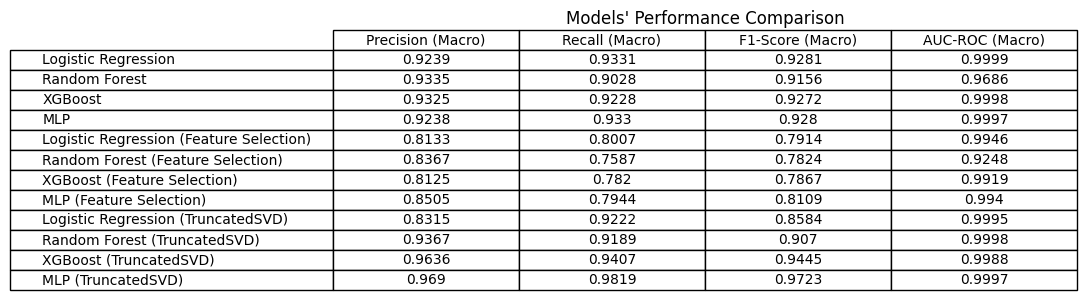

In [ ]:
# Dictionary to store evaluation results
metrics_summary = {}

# Save the results of baseline dataset into dictionary
for name, y_pred in models_y_pred.items():
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Extract macro precision, recall, f1-score
    metrics_summary[name] = {
        "Precision (Macro)": report["macro avg"]["precision"],
        "Recall (Macro)": report["macro avg"]["recall"],
        "F1-Score (Macro)": report["macro avg"]["f1-score"],
        "AUC-ROC (Macro)": models_auc[name]
    }

# Save the results of Feature Selected dataset into dictionary
for name, y_pred in models_y_pred_selected.items():
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Extract macro precision, recall, f1-score
    metrics_summary[name + " (Feature Selection)"] = {
        "Precision (Macro)": report["macro avg"]["precision"],
        "Recall (Macro)": report["macro avg"]["recall"],
        "F1-Score (Macro)": report["macro avg"]["f1-score"],
        "AUC-ROC (Macro)": models_auc_selected[name]
    }

# Save the results of TruncatedSVD dataset into dictionary
for name, y_pred in models_y_pred_svd.items():
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Extract macro precision, recall, f1-score
    metrics_summary[name + " (TruncatedSVD)"] = {
        "Precision (Macro)": report["macro avg"]["precision"],
        "Recall (Macro)": report["macro avg"]["recall"],
        "F1-Score (Macro)": report["macro avg"]["f1-score"],
        "AUC-ROC (Macro)": models_auc_svd[name]
    }

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_summary).T

# Round for neat display
df_metrics = df_metrics.round(4)

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_metrics.values,
                 colLabels=df_metrics.columns,
                 rowLabels=df_metrics.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title("Models' Performance Comparison", fontsize=12, pad=15)
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\('
<>:13: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-3838614520.py:13: SyntaxWarning: invalid escape sequence '\('
  df_plot["ML Models"] = df_plot["Model"].str.replace(" \(Feature Selection\)| \(TruncatedSVD\)", "", regex=True)


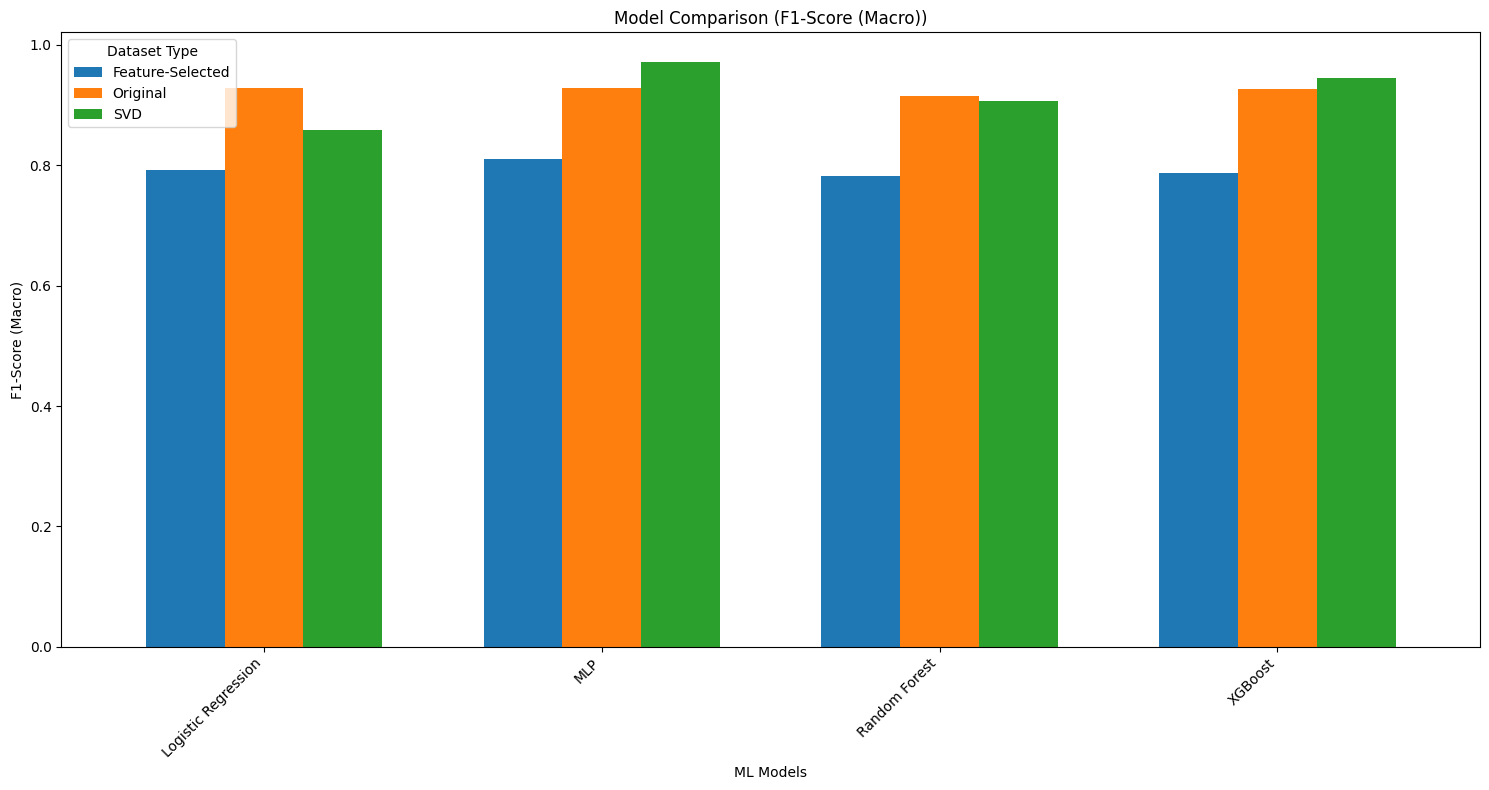

In [ ]:
# F1-Score is selected
metric = "F1-Score (Macro)"

# Reset index for plotting
df_plot = df_metrics[[metric]].reset_index()
df_plot.rename(columns={"index": "Model"}, inplace=True)

# Separate transformation type
df_plot["Type"] = df_plot["Model"].apply(lambda x: "Feature-Selected" if "(Feature Selection)" in x
                                         else ("SVD" if "(TruncatedSVD)" in x else "Original"))

# Clean model names (remove suffix)
df_plot["ML Models"] = df_plot["Model"].str.replace(" \(Feature Selection\)| \(TruncatedSVD\)", "", regex=True)

# Pivot for grouped bars
df_pivot = df_plot.pivot(index="ML Models", columns="Type", values=metric)

# Plot grouped bar chart
df_pivot.plot(kind="bar", figsize=(15, 8), width=0.7)

plt.ylabel(metric)
plt.title(f"Model Comparison ({metric})")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Dataset Type", loc="best")
plt.tight_layout()
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\('
<>:13: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-3691238116.py:13: SyntaxWarning: invalid escape sequence '\('
  df_plot["ML Models"] = df_plot["Model"].str.replace(" \(Feature Selection\)| \(TruncatedSVD\)", "", regex=True)


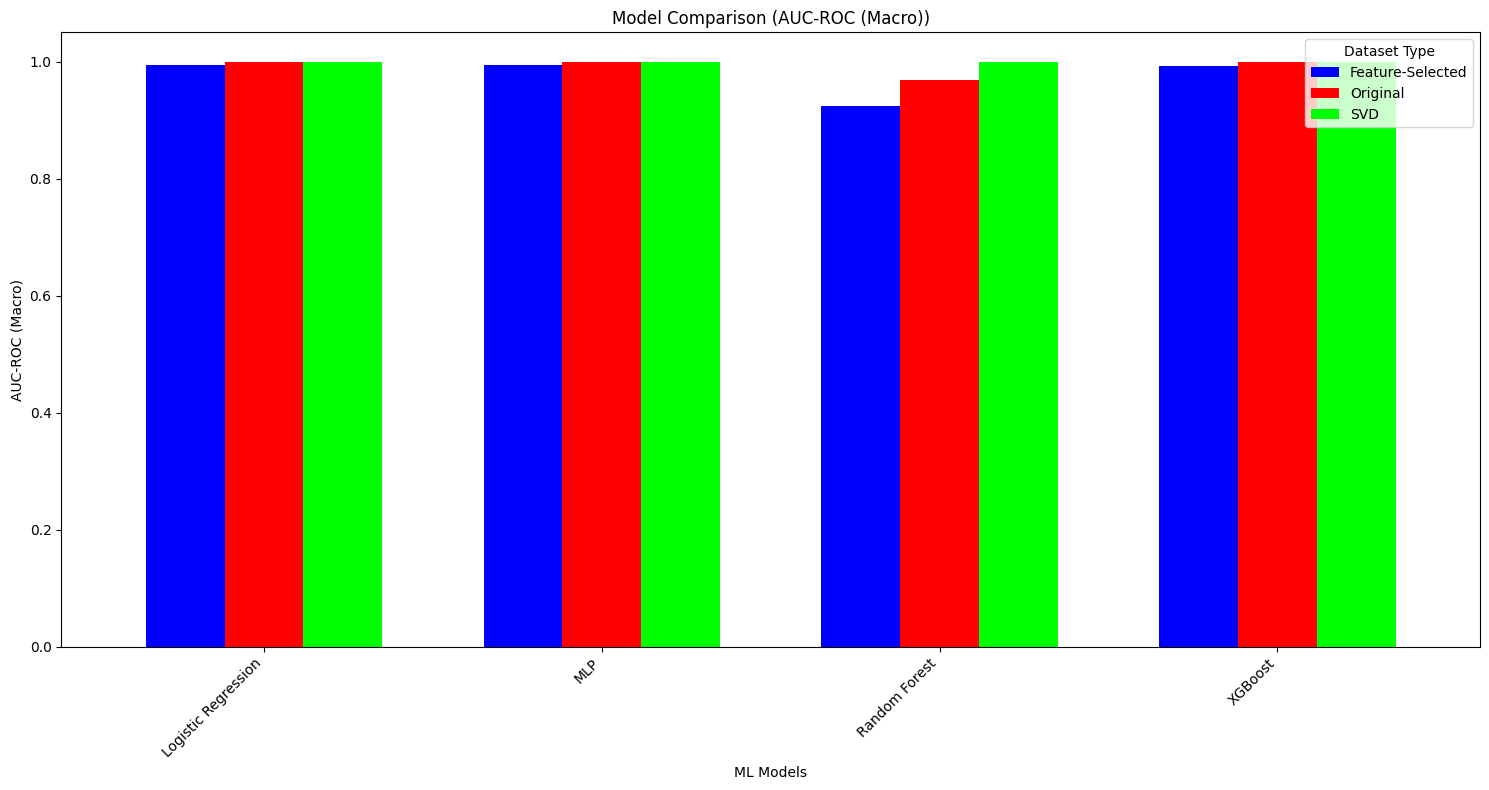

In [ ]:
# F1-Score is selected
metric = "AUC-ROC (Macro)"

# Reset index for plotting
df_plot = df_metrics[[metric]].reset_index()
df_plot.rename(columns={"index": "Model"}, inplace=True)

# Separate transformation type
df_plot["Type"] = df_plot["Model"].apply(lambda x: "Feature-Selected" if "(Feature Selection)" in x
                                         else ("SVD" if "(TruncatedSVD)" in x else "Original"))

# Clean model names (remove suffix)
df_plot["ML Models"] = df_plot["Model"].str.replace(" \(Feature Selection\)| \(TruncatedSVD\)", "", regex=True)

# Pivot for grouped bars
df_pivot = df_plot.pivot(index="ML Models", columns="Type", values=metric)

# Plot grouped bar chart
df_pivot.plot(kind="bar", figsize=(15, 8), width=0.7, colormap="brg")

plt.ylabel(metric)
plt.title(f"Model Comparison ({metric})")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Dataset Type", loc="best")
plt.tight_layout()
plt.show()

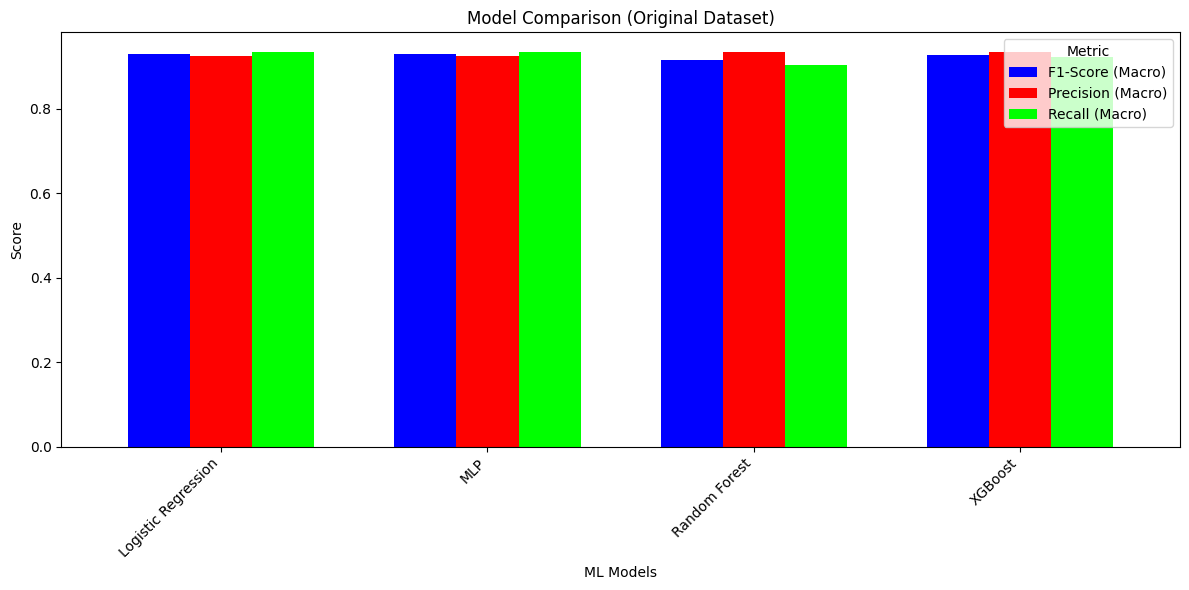

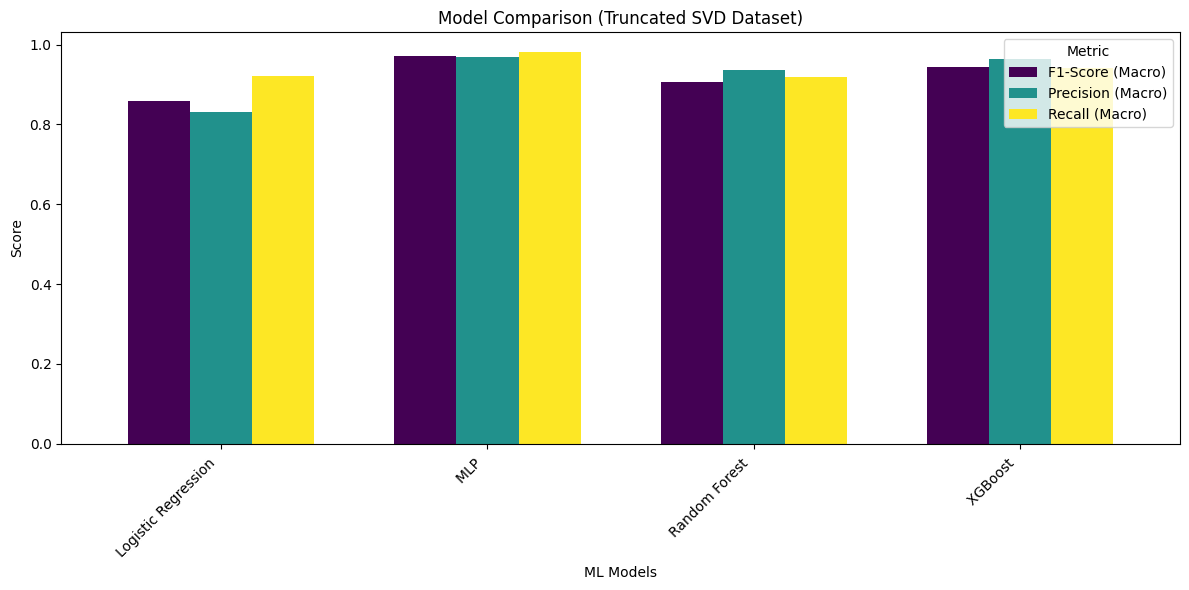

In [ ]:
# Plot bar graph to get the model with most balance performance
# Select Precision, Recall, and F1-score
metrics_to_plot = ["Precision (Macro)", "Recall (Macro)", "F1-Score (Macro)"]

# Reset index for plotting
df_long = df_metrics[metrics_to_plot].reset_index()
df_long.rename(columns={"index": "Model"}, inplace=True)

# Identify dataset type
df_long["Type"] = df_long["Model"].apply(lambda x: "Feature Selection" if "(Feature Selection)" in x
                                         else ("TruncatedSVD" if "(TruncatedSVD)" in x else "Raw"))

# Clean model names (remove suffix for clarity)
df_long["ML Models"] = df_long["Model"].str.replace(r"\(TruncatedSVD\)", "", regex=True)

# Melt into long format
df_melted = df_long.melt(id_vars=["ML Models", "Type"],
                         value_vars=metrics_to_plot,
                         var_name="Metric",
                         value_name="Score")

# Separate datasets
df_ori = df_melted[df_melted["Type"] == "Raw"]
df_svd = df_melted[df_melted["Type"] == "TruncatedSVD"]

# Plot for Original Dataset
df_ori_pivot = df_ori.pivot(index="ML Models", columns="Metric", values="Score")
df_ori_pivot.plot(kind="bar", figsize=(12, 6), width=0.7, colormap="brg")
plt.title("Model Comparison (Original Dataset)")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# Plot for Truncated SVD Dataset
df_svd_pivot = df_svd.pivot(index="ML Models", columns="Metric", values="Score")
df_svd_pivot.plot(kind="bar", figsize=(12, 6), width=0.7, colormap="viridis")
plt.title("Model Comparison (Truncated SVD Dataset)")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

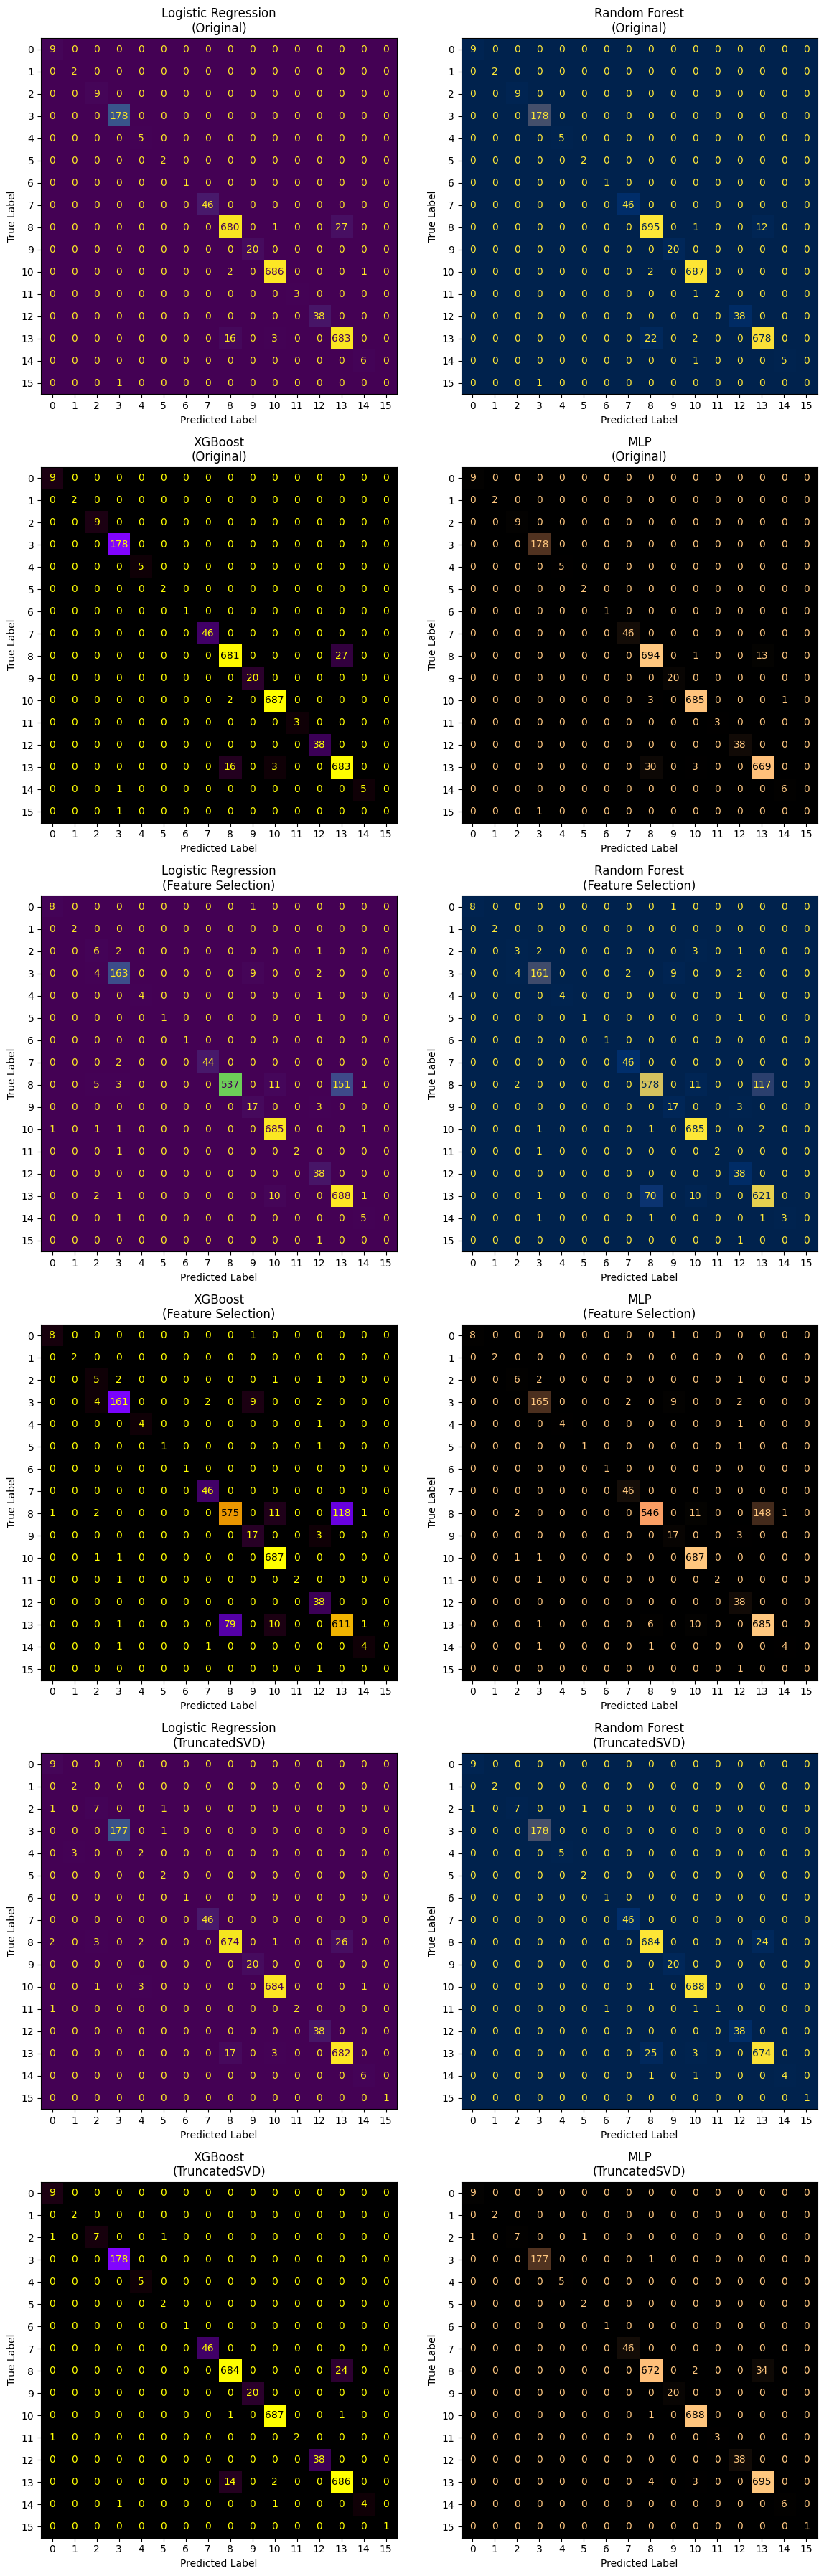

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Define colors for each models
colors = ['viridis', 'cividis', 'gnuplot', 'copper']

# Define datasets and predictions
dataset_dict = {
    "Original": models_y_pred,
    "Feature Selection": models_y_pred_selected,
    "TruncatedSVD": models_y_pred_svd
}

# Get the number of models
model_names = list(models_y_pred.keys())
n_models = len(model_names)
n_datasets = len(dataset_dict)

# 2 models per row → calculate required cols and rows
n_cols = 2
n_rows = int(np.ceil(n_models * n_datasets / n_cols))

# Create subplots where rows = datasets and cols = models
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

plot_idx = 0
for dataset_name, predictions in dataset_dict.items():
    for model_idx, model_name in enumerate(model_names):
        y_pred = predictions[model_name]
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm)

        # Assign axis
        ax = axes[plot_idx]
        disp.plot(ax=ax, cmap=colors[model_idx % len(colors)], colorbar=False)
        ax.set_title(f"{model_name}\n({dataset_name})")
        ax.set_xlabel("Predicted Label")
        ax.set_ylabel("True Label")

        plot_idx += 1

# Hide unused subplots (if any)
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# XAI

## Global Explanation

In [ ]:
import shap

xgb_model = XGBClassifier(...).fit(X_resampled_svd, y_resampled_svd)

# Use TreeExplainer for XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)

# Compute SHAP values
# limit to 50 samples (for speed)
shap_values = explainer_xgb.shap_values(X_test_svd[:50])

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


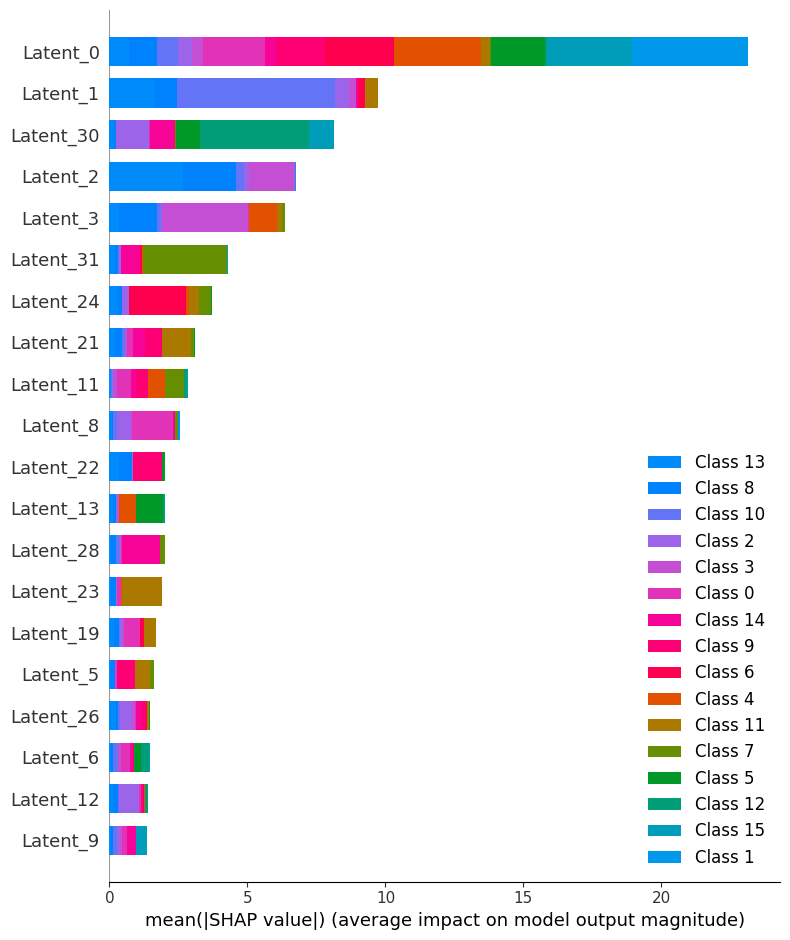

In [ ]:
# Global summary plot (mean absolute SHAP values)
shap.summary_plot(
    shap_values,
    X_test_svd[:50],
    feature_names=[f"Latent_{i}" for i in range(X_test_svd.shape[1])],
    plot_type="bar"
)

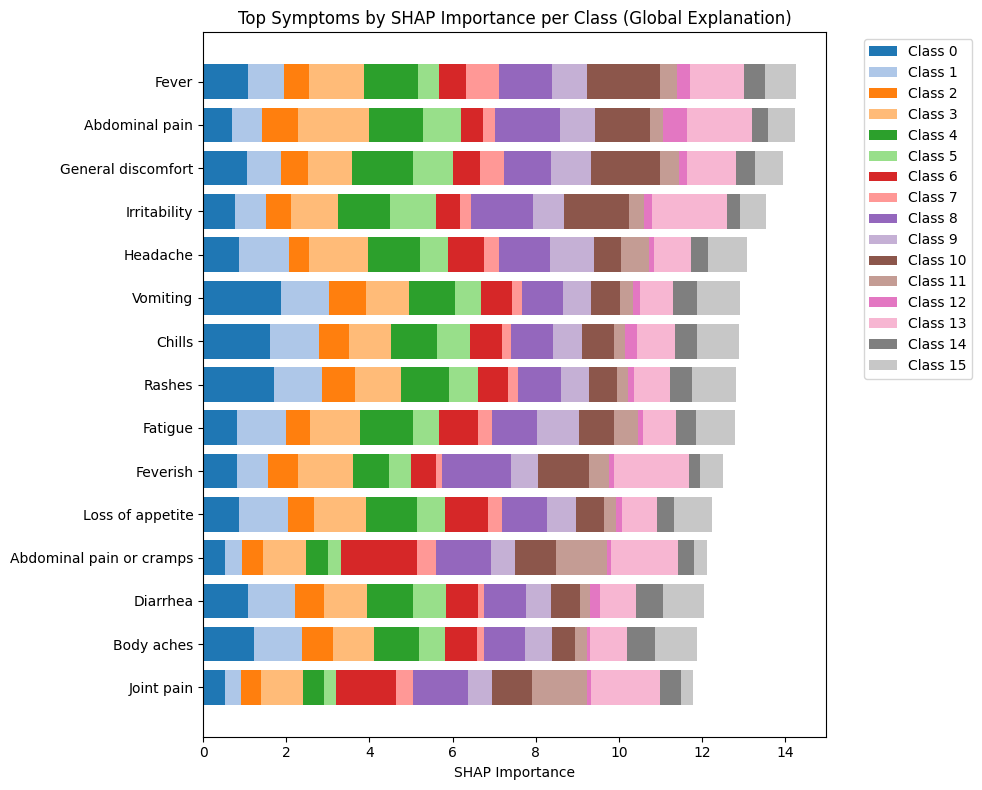

In [ ]:
# Each shap_values has shape (n_samples, n_latent_features, n_classes)
# Reshape the shap_values for class i
shap_values_per_class = [shap_values[:, :, i] for i in range(shap_values.shape[2])]

# Aggregate mean absolute SHAP per latent feature
per_class_latent = [np.mean(np.abs(sv), axis=0) for sv in shap_values_per_class]

components = svd.components_

# Compute importance per class in original symptom space
# Result: list of arrays (n_symptoms,) per class
symptom_importance_per_class = [np.dot(class_shap, np.abs(components)) for class_shap in per_class_latent]

# Build DataFrame
symptom_importance_df = pd.DataFrame({
    "Symptom": mlb.classes_
})

for i, class_imp in enumerate(symptom_importance_per_class):
    symptom_importance_df[f"Class_{i}"] = class_imp

# Sort by total importance
symptom_importance_df["Total"] = symptom_importance_df[[f"Class_{i}" for i in range(len(symptom_importance_per_class))]].sum(axis=1)
symptom_importance_df = symptom_importance_df.sort_values("Total", ascending=False)

# Plot stacked bar chart for top 15 symptoms
top_k = 15
top_symptoms = symptom_importance_df.head(top_k)
bottom = np.zeros(top_k)
colors = plt.cm.tab20.colors  # up to 20 classes

plt.figure(figsize=(10,8))
for i in range(len(symptom_importance_per_class)):
    plt.barh(top_symptoms["Symptom"],
             top_symptoms[f"Class_{i}"],
             left=bottom,
             color=colors[i % len(colors)],
             label=f"Class {i}")
    bottom += top_symptoms[f"Class_{i}"].values

plt.gca().invert_yaxis()
plt.xlabel("SHAP Importance")
plt.title("Top Symptoms by SHAP Importance per Class (Global Explanation)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# For each latent feature, get top contributing symptoms
n_top_symptoms = 5
latent_symptom_map = {}

for i in range(components.shape[0]):  # each latent dimension
    top_idx = np.argsort(np.abs(components[i]))[::-1][:n_top_symptoms]
    latent_symptom_map[f"Latent_{i}"] = [mlb.classes_[j] for j in top_idx]

# Display mapping
for latent, symptoms in latent_symptom_map.items():
    print(f"{latent}: {symptoms}")

Latent_0: ['Headache', 'Loss of appetite', 'Fatigue', 'Chills', 'Vomiting']
Latent_1: ['Sore throat', 'Cough', 'Red eyes', 'Rash', 'Runny nose']
Latent_2: ['Feverish', 'Irritability', 'Abdominal pain', 'Abdominal pain or cramps', 'Joint pain']
Latent_3: ['Headache', 'Abdominal pain', 'Loss of appetite', 'Fatigue', 'Fever']
Latent_4: ['Loss of appetite', 'Fatigue', 'Headache', 'Diarrhea', 'Body aches']
Latent_5: ['Headache', 'Fatigue', 'Loss of appetite', 'Vomiting', 'General discomfort']
Latent_6: ['Chills', 'Diarrhea', 'Rashes', 'Vomiting', 'Loss of appetite']
Latent_7: ['Body aches', 'Diarrhea', 'Chills', 'Vomiting', 'Rashes']
Latent_8: ['Vomiting', 'Rashes', 'Chills', 'Body aches', 'Muscle aches']
Latent_9: ['Rashes', 'Vomiting', 'Diarrhea', 'Body aches', 'Chills']
Latent_10: ['Fever', 'Loss of appetite', 'Fatigue', 'Rashes', 'Headache']
Latent_11: ['Fever', 'General discomfort', 'Irritability', 'Abdominal pain', 'Muscle aches']
Latent_12: ['Feverish', 'Abdominal pain', 'Stomach cra

## Local Explaination

In [ ]:
# Pick one test sample
sample_id = 1
sample = X_test_svd[sample_id:sample_id+1]

# Get SHAP values for this sample
sample_shap = explainer_xgb.shap_values(sample)

# Get the real label
print(y_test[sample_id])

# Predict class probabilities for the sample
probs = xgb_model.predict_proba(sample)

# Get the highest probability class
pred_class = np.argmax(probs)
print("Predicted class:", pred_class, "with prob:", probs[0][pred_class])

10
Predicted class: 10 with prob: 0.99998736


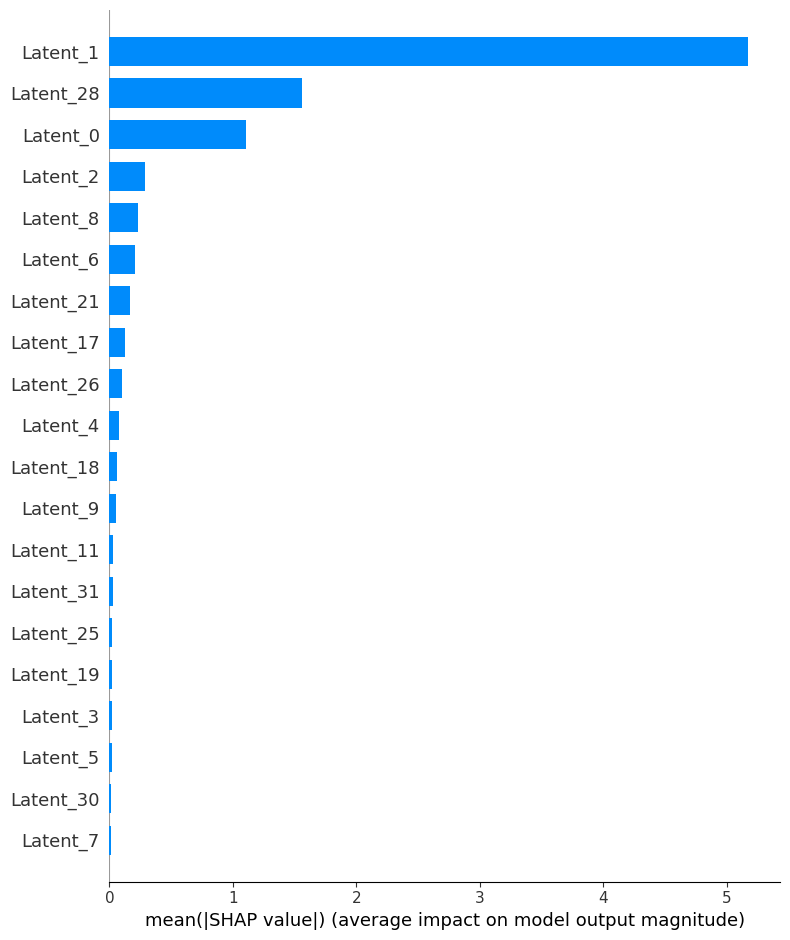

In [ ]:
# Extract SHAP values for that class: shape (1, n_latent)
sample_shap_pred = sample_shap[:, :, pred_class]

# Plot latent-level SHAP for selected sample
shap.summary_plot(
    sample_shap_pred,
    sample,
    feature_names=[f"Latent_{i}" for i in range(sample.shape[1])],
    plot_type="bar"
)

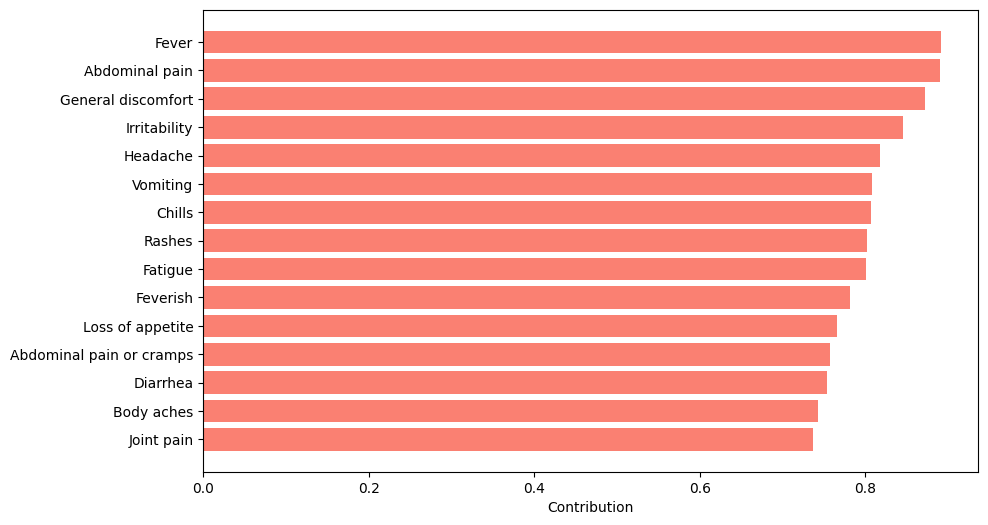

In [ ]:
# Weighted sum of symptom in all latents
global_symptom_contrib = np.dot(np.abs(latent_shap), np.abs(components))

# Build DaraFrame for readability
# Get the top 15 symptoms
df_global = pd.DataFrame({
    "Symptom": mlb.classes_,
    "Contribution": global_symptom_contrib
}).sort_values("Contribution", ascending=False).head(15)

plt.figure(figsize=(10,6))
plt.barh(df_global["Symptom"], df_global["Contribution"], color="salmon")
plt.gca().invert_yaxis()
plt.xlabel("Contribution")
plt.show()

## XAI - MLP (Raw Dataset)

### Global Explanation

In [ ]:
f = lambda x: mlp.predict(x).astype(float)

# Use a small background sample from training data for KernelExplainer
background = X_resampled[np.random.choice(X_resampled[0], 100, replace=False)]

# Use KernelExplainer for MLP
explainer_mlp = shap.KernelExplainer(f, background)

# Compute SHAP values
# limit to 50 samples (for speed)
shap_values_mlp = explainer_mlp.shap_values(X_test[:50])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
6507/6507 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6507/6507 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6507/6507 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6519/6519 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6525/6525 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

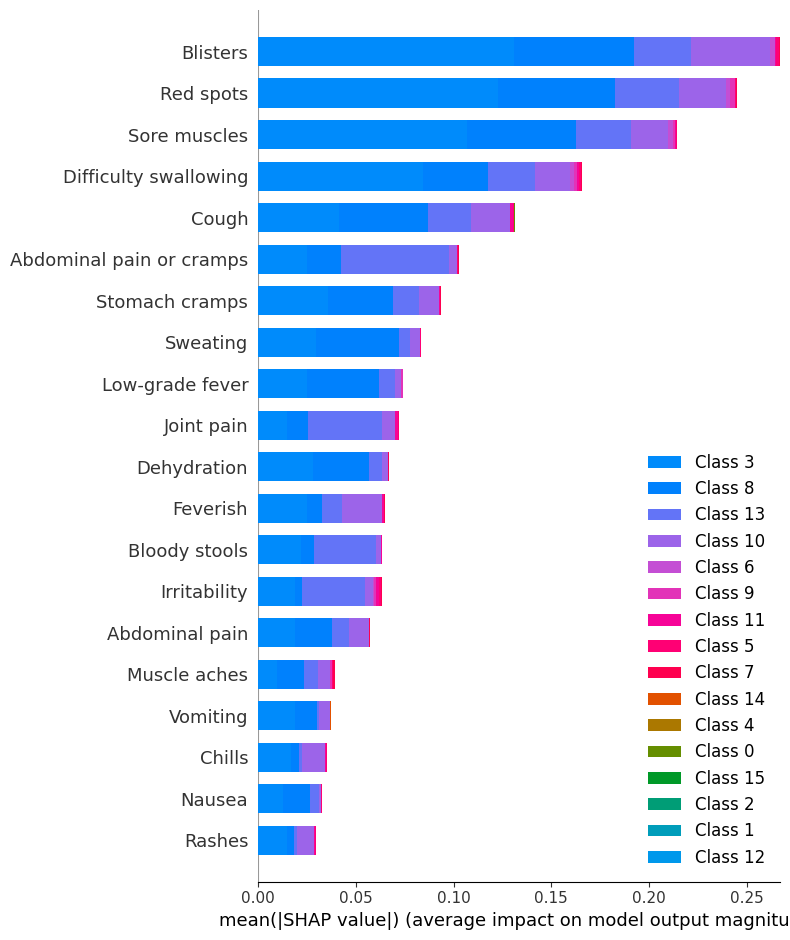

In [ ]:
#  Global summary plot (mean absolute SHAP values)
shap.summary_plot(
    shap_values_mlp,
    X_test[:50],
    feature_names=mlb.classes_,
    plot_type="bar"
)

### Local Explanation

In [ ]:
# Pick one test sample
# sample_id = 4
sample = X_test[sample_id:sample_id+1]

# Get SHAP values for this sample
sample_shap = explainer_mlp.shap_values(sample)

# Get the real label
print(y_test[sample_id])

# Predict class probabilities for the sample
probs = mlp.predict(sample).astype(float)

# Get the highest probability class
pred_class = np.argmax(probs)
print("Predicted class:", pred_class, "with prob:", probs[0][pred_class])

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: 10 with prob: 1.0


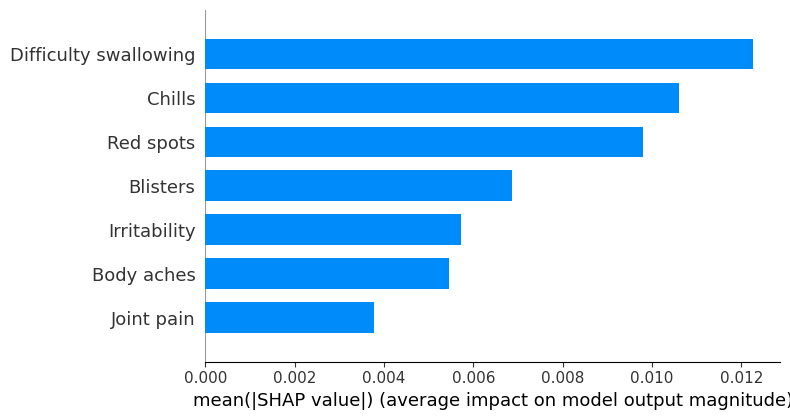

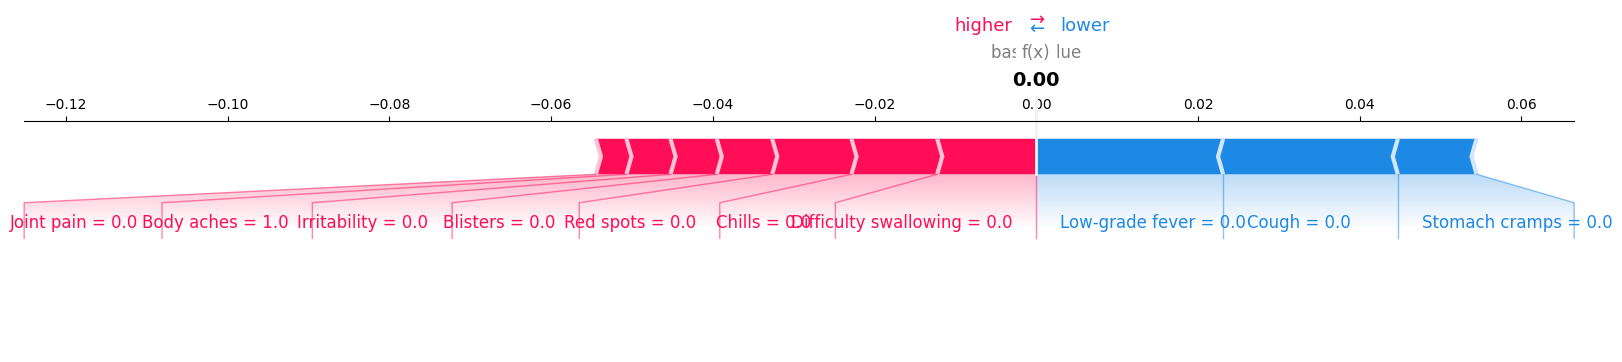

In [ ]:
sample_shap_pred = shap_values_mlp[:, :, pred_class][0]

# Reshape to (1, n_features)
if sample_shap_pred.ndim == 1:
    sample_shap_pred = sample_shap_pred.reshape(1, -1)

shap_values_positive = sample_shap_pred.copy()
features_positive_mask = shap_values_positive[0] > 0  # boolean mask
shap_values_positive = shap_values_positive[:, features_positive_mask]
sample_positive_features = sample[:, features_positive_mask]
feature_names_positive = np.array(mlb.classes_)[features_positive_mask]

# Summary plot for selected sample
shap.summary_plot(
    shap_values_positive,
    sample_positive_features,
    feature_names=feature_names_positive,
    plot_type="bar"
)

# Base value (expected value) for KernelExplainer
base_value = explainer_mlp.expected_value[pred_class] if isinstance(explainer_mlp.expected_value, (list, np.ndarray)) else explainer_mlp.expected_value

# Force plot for selected sample
shap.force_plot(
    base_value=base_value,
    shap_values=sample_shap_pred,
    features=sample[0],
    feature_names=mlb.classes_,
    matplotlib=True
)